## Predicting Heart disease
 The project uses various python based machine learning and data science libraries to build a model capable of predicitng whether someone has heart disease or not.

#### Problem Definition
##### Data
>Given parameters of patient, we are predicting whether someone has heart disease or not
>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date. https://archive.ics.uci.edu/dataset/45/heart+disease
##### Features
* Feature	Description	Example Values
* age	Age in years	29, 45, 60
* sex	1 = male; 0 = female	0, 1
* cp	Chest pain type	0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)
* trestbps	Resting blood pressure (in mm Hg on admission to the hospital)	120, 140, 150
* chol	Serum cholesterol in mg/dl	180, 220, 250
* fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)	0, 1
* restecg	Resting electrocardiographic results	0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy
* thalach	Maximum heart rate achieved	160, 180, 190
* exang	Exercise induced angina (1 = yes; 0 = no)	0, 1
* oldpeak	ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest	0.5, 1.0, 2.0
* slope	The slope of the peak exercise ST segment	0: Upsloping, 1: Flatsloping, 2: Downsloping
* ca	Number of major vessels (0-3) colored by fluoroscopy	0, 1, 2, 3
* thal	Thalium stress result	1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect
* target	Have disease or not (1 = yes; 0 = no)	0, 1


##### Evaluation
For proof of concept achieving accuracy minimum of 95%.


In [1]:
#### EDA(Exploratory Data Analysis) and Plotting Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

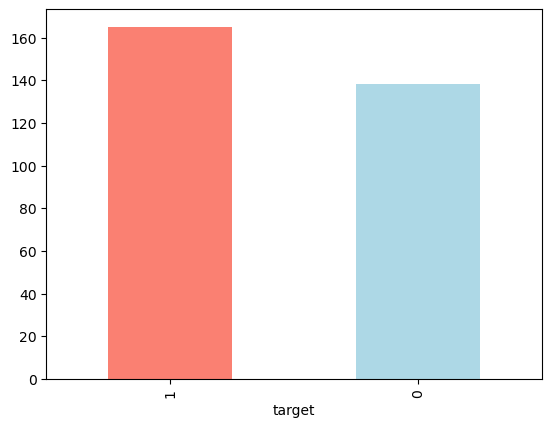

In [5]:
plt.clf();
df["target"].value_counts().plot(kind= "bar", color=["salmon", "lightblue"]);
plt.show();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum() 
#no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease according 'sex'

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
#comparing target and sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<Figure size 640x480 with 0 Axes>

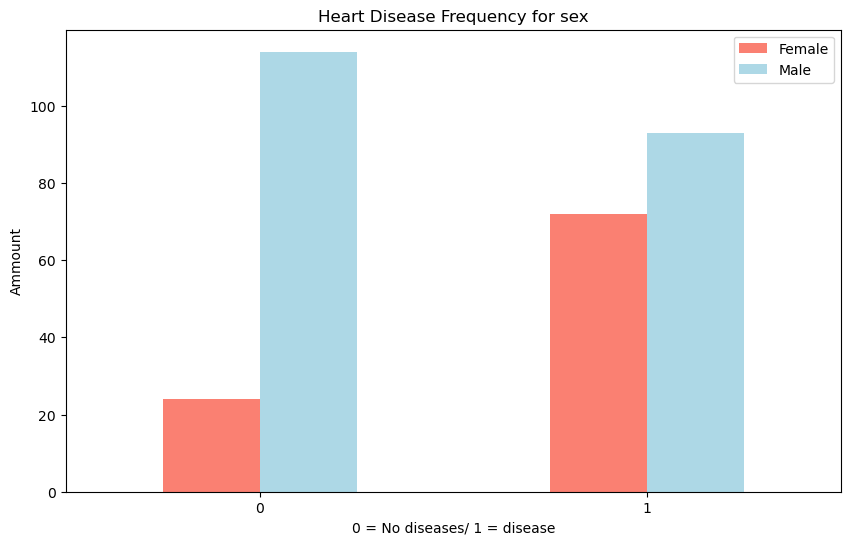

In [11]:
plt.clf();
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ['salmon', 'lightblue']);
plt.title("Heart Disease Frequency for sex");
plt.xlabel("0 = No diseases/ 1 = disease");
plt.ylabel("Ammount");
plt.legend(['Female', 'Male']);
plt.xticks(rotation = 0);
plt.show();

## Age vs Mac Heart Rate

<Figure size 640x480 with 0 Axes>

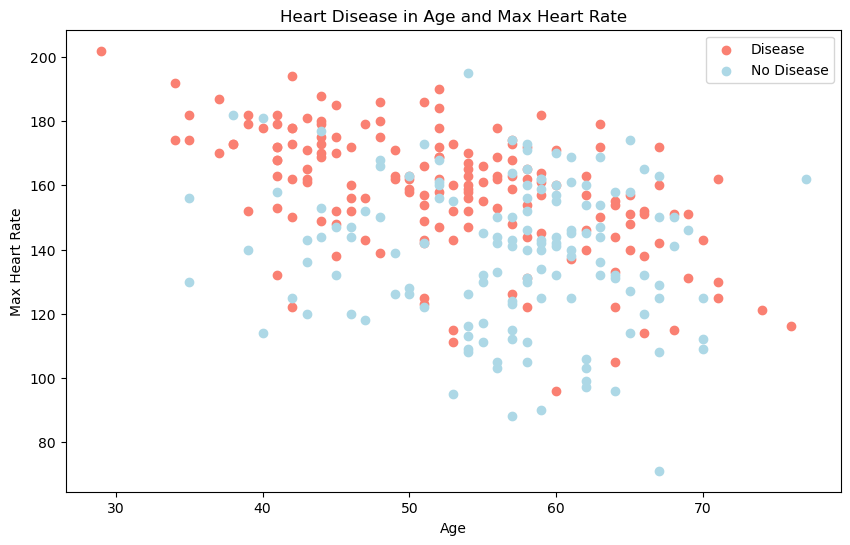

In [12]:
plt.clf();
plt.figure(figsize=(10,6));
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'salmon');
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'lightblue');
plt.title("Heart Disease in Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(['Disease', 'No Disease']);
plt.show();



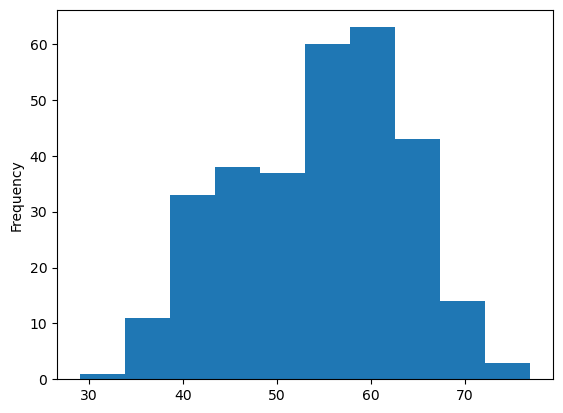

In [13]:
plt.clf();
df.age.plot.hist();
plt.show();

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Figure size 640x480 with 0 Axes>

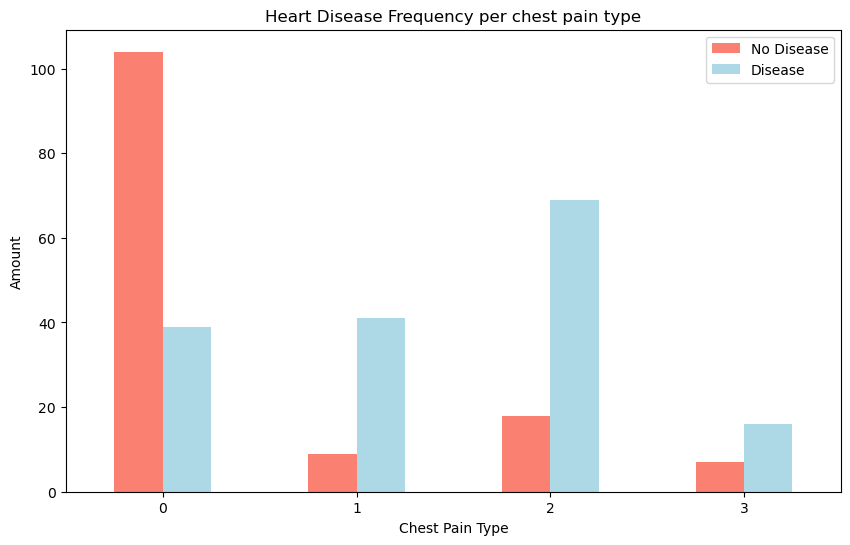

In [15]:
plt.clf();
pd.crosstab(df.cp, df.target).plot(kind= "bar", figsize = (10, 6), color= ['salmon', 'lightblue']);
plt.title("Heart Disease Frequency per chest pain type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation= 0);
plt.show();

### Correlation Matrix 

<Figure size 640x480 with 0 Axes>

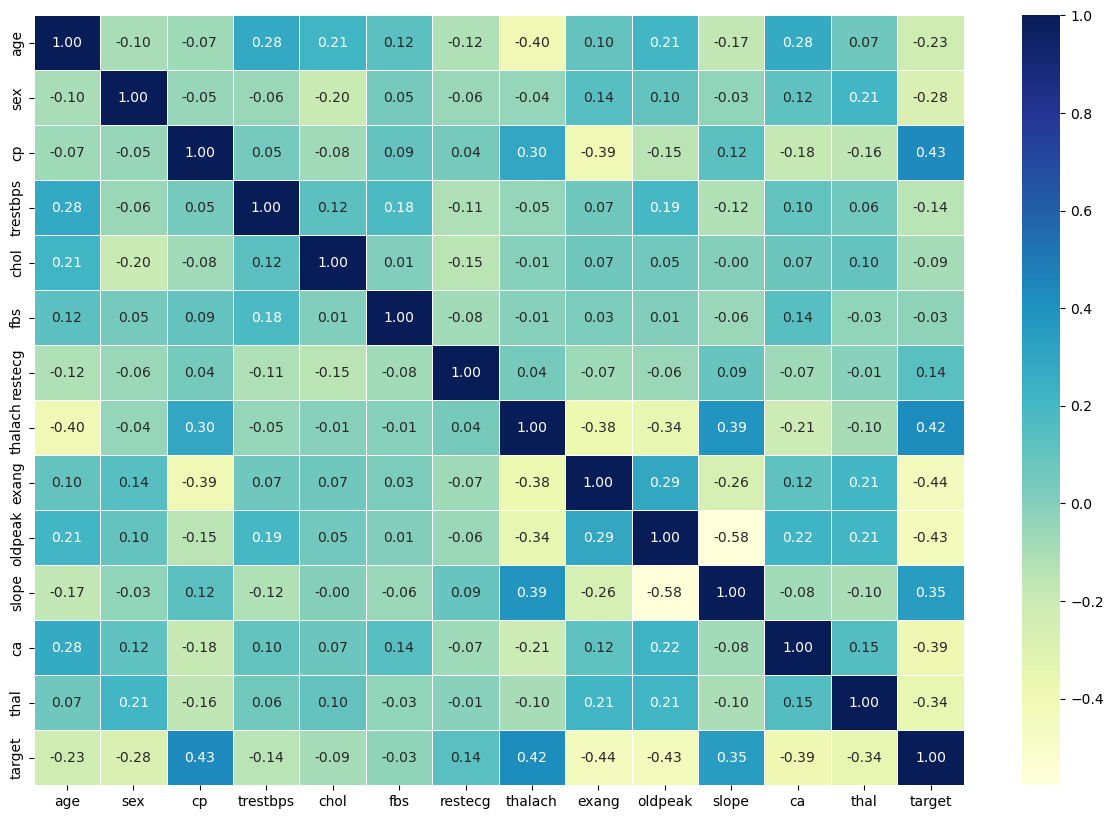

In [16]:
corr_matrix = df.corr()
plt.clf();
fig, ax = plt.subplots(figsize = (15,10));
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu");
# bottom, top = ax.get_ylim();
# ax.set_ylim(bottom +0.5, bottom - 0.5);
plt.show();

### 5.1 Modeling

In [17]:
# splitting dat in x and y
X = df.drop('target', axis = 1)
Y = df['target']
np.random.seed(42)

# train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 


In [18]:
# putiing all models in dictionary
models = {"Logistic Regression" : LogisticRegression(solver='saga',max_iter=500),
          "KNN" : KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates the machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # list to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [19]:
# without scaling 
# {'Logistic Regression': 0.8524590163934426,
#  'KNN': 0.6885245901639344,
#  'Random Forest': 0.8360655737704918}
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scores = fit_and_score(models = models, X_train = X_train_scaled, Y_train = Y_train, X_test = X_test_scaled, Y_test = Y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

<Figure size 640x480 with 0 Axes>

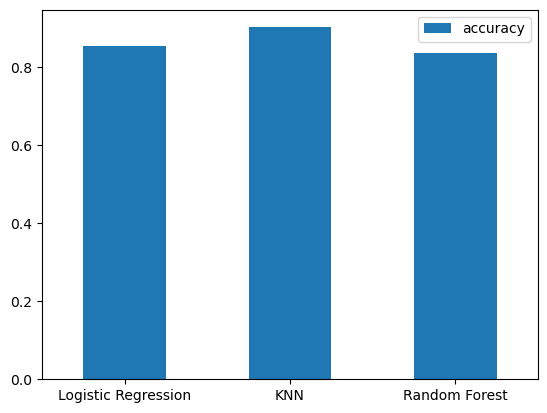

In [20]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
plt.clf();
model_compare.T.plot.bar();
plt.xticks(rotation= 0);
plt.show();

### Tuning hyperparameter

In [21]:
#tuning KNN
train_scores = []
test_scores = []

neighbors = range(1, 21)

#setting KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    #fit algorithm
    knn.fit(X_train_scaled, Y_train)
    train_scores.append(knn.score(X_train_scaled, Y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test_scaled, Y_test))


In [22]:
test_scores

[0.8524590163934426,
 0.819672131147541,
 0.8524590163934426,
 0.8524590163934426,
 0.9016393442622951,
 0.9016393442622951,
 0.9180327868852459,
 0.8688524590163934,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951]

In [23]:
train_scores

[1.0,
 0.8842975206611571,
 0.8884297520661157,
 0.8636363636363636,
 0.8553719008264463,
 0.8512396694214877,
 0.8677685950413223,
 0.8636363636363636,
 0.8553719008264463,
 0.8429752066115702,
 0.8347107438016529,
 0.8347107438016529,
 0.8471074380165289,
 0.8471074380165289,
 0.859504132231405,
 0.8553719008264463,
 0.8388429752066116,
 0.8553719008264463,
 0.8388429752066116,
 0.8429752066115702]

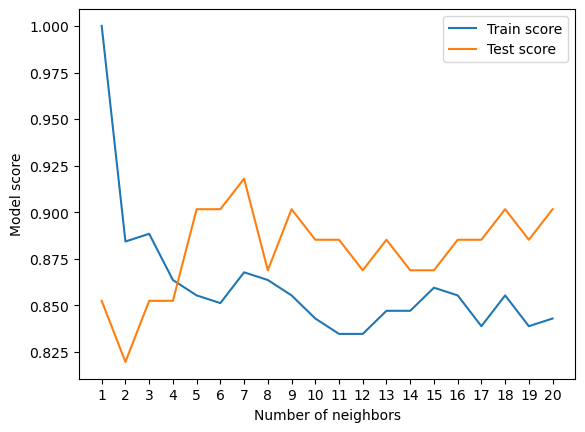

Maximum KNN score on the test data: 91.80%


In [24]:
plt.clf();
plt.plot(neighbors, train_scores, label="Train score");
plt.plot(neighbors, test_scores, label="Test score");
plt.xticks(np.arange(1, 21, 1));
plt.xlabel("Number of neighbors");
plt.ylabel("Model score");
plt.legend();
plt.show();
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

In [25]:
# Logistic Regression
# hyperparameter grid
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ['liblinear']
}
# Random Forest Classifier
# hyperparameter grid
# Hyperparameter grid
rf_grid = { 
    "n_estimators": np.arange(10, 1000, 50),  # Correct key name
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [26]:
# Logistic Regresson
np.random.seed(42)

#setup
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, cv = 5, n_iter = 20, verbose = True)

rs_log_reg.fit(X_train, Y_train )

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [28]:
# Random Forest Classifier
np.random.seed(42)

#setup
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, n_iter = 20, verbose = True)

rs_rf_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rf_clf.score(X_test, Y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV

In [30]:
# Logistic Regresson
np.random.seed(42)

#setup
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose = True)

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [32]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and fit the KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

# Evaluate the model
model_score = knn_model.score(X_test_scaled, Y_test)
model_score

0.9016393442622951

In [43]:
X_test_scaled = scaler.transform(X_test)
y_knn_preds = knn_model.predict(X_test_scaled)
y_knn_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

<Figure size 640x480 with 0 Axes>

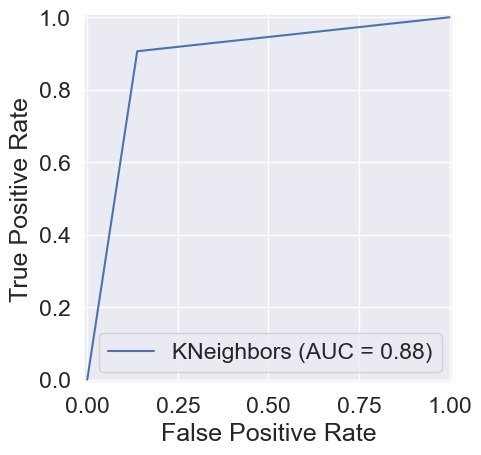

In [46]:
## KNeighbors Evaluation
# ROC curve, calculating AUC metric
fpr, tpr, thresholds = roc_curve(Y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.clf();
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="KNeighbors").plot()
plt.show();

<Figure size 640x480 with 0 Axes>

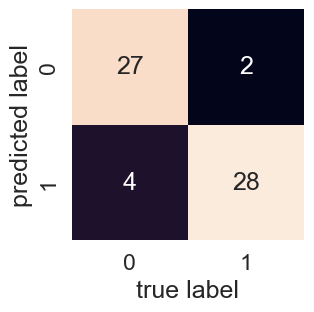

In [47]:
# Confusion Matrix
sns.set(font_scale= 1.5)
def plot_conf_mat(Y_test, y_preds):
     """
     Plot using heatmap
     """
     fig, ax = plt.subplots(figsize=(3, 3))
     ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
     plt.xlabel("true label")
     plt.ylabel("predicted label")
    
plt.clf();
plot_conf_mat(Y_test, y_knn_preds);
plt.show();

In [52]:
 # Classification Report And Cross validated precision, f1 score and recall
print(classification_report(Y_test,y_knn_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Logistic Regression Evaluation

<Figure size 640x480 with 0 Axes>

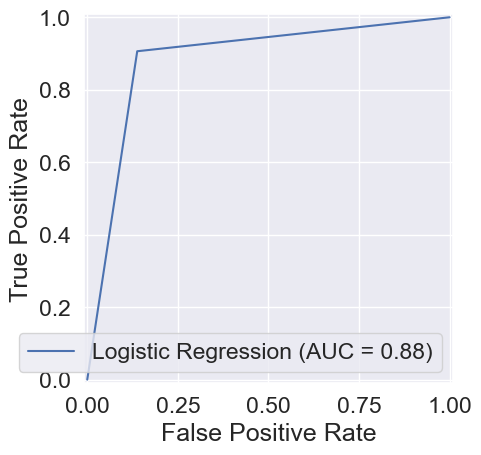

In [49]:
# ROC curve, calculating AUC metric
fpr, tpr, thresholds = roc_curve(Y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.clf();
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression").plot()
plt.show();

<Figure size 640x480 with 0 Axes>

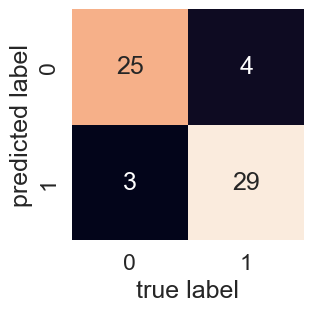

In [50]:
# Confusion Matrix
sns.set(font_scale= 1.5)
def plot_conf_mat(Y_test, y_preds):
     """
     Plot using heatmap
     """
     fig, ax = plt.subplots(figsize=(3, 3))
     ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
     plt.xlabel("true label")
     plt.ylabel("predicted label")
    
plt.clf();
plot_conf_mat(Y_test, y_preds);
plt.show();

In [51]:
 # Classification Report And Cross validated precision, f1 score and recall
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Using best params for both

In [53]:
# KNeighbors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and fit the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train_scaled, Y_train)

# Evaluate the model
model_score = knn_model.score(X_test_scaled, Y_test)
model_score

0.9180327868852459

In [78]:
%%time
# Cross-validated accuracy score
cv_acc_knn = cross_val_score(knn_model,
                         X,
                         Y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
# Cross-validated precision score
cv_precision_knn = cross_val_score(knn_model,
                                       X,
                                       Y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision") # precision as scoring

cv_recall_knn = cross_val_score(knn_model,
                                       X,
                                       Y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="recall") # precision as scoring

cv_f1score_knn = cross_val_score(knn_model,
                                       X,
                                       Y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="f1") # precision as scoring
print("Accuracy Array", cv_acc_knn)
print("Mean Accuracy", np.mean(cv_acc_knn))
print("\n")

print("Precision",cv_precision_knn)
print("Mean Precision", np.mean(cv_precision_knn))
print("\n")

print("Precision",cv_recall_knn)
print("Mean Precision", np.mean(cv_recall_knn))
print("\n")

print("Precision",cv_f1score_knn)
print("Mean Precision", np.mean(cv_f1score_knn))
print("\n")

Accuracy Array [0.60655738 0.63934426 0.60655738 0.75       0.6       ]
Mean Accuracy 0.6404918032786886


Precision [0.63636364 0.64102564 0.61538462 0.76470588 0.64516129]
Mean Precision 0.660528213089883


Precision [0.63636364 0.75757576 0.72727273 0.78787879 0.60606061]
Mean Precision 0.703030303030303


Precision [0.63636364 0.69444444 0.66666667 0.7761194  0.625     ]
Mean Precision 0.6797188300919644


CPU times: user 88 ms, sys: 3.53 ms, total: 91.6 ms
Wall time: 90 ms


<Figure size 640x480 with 0 Axes>

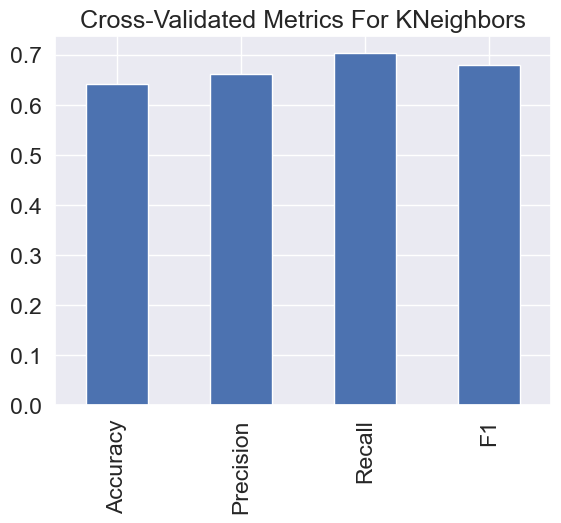

In [79]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc_knn),
                            "Precision": np.mean(cv_precision_knn),
                            "Recall": np.mean(cv_recall_knn),
                            "F1": np.mean(cv_f1score_knn)
                                          },
                          index=[0])
plt.clf();
cv_metrics.T.plot.bar(title="Cross-Validated Metrics For KNeighbors", legend=False);
plt.show();

In [56]:
# Logistic Regression
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8852459016393442

In [80]:
%%time
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
# Cross-validated precision score
cv_precision = cross_val_score(clf,
                               X,
                               Y,
                               cv=5, # 5-fold cross-validation
                               scoring="precision") # precision as scoring

cv_recall = cross_val_score(clf,
                           X,
                           Y,
                           cv=5, # 5-fold cross-validation
                           scoring="recall") # precision as scoring

cv_f1score = cross_val_score(clf,
                               X,
                               Y,
                               cv=5, # 5-fold cross-validation
                               scoring="f1") # precision as scoring

print("Accuracy Array", cv_acc)
print("Mean Accuracy", np.mean(cv_acc))
print("\n")

print("Precision",cv_precision)
print("Mean Precision", np.mean(cv_precision))
print("\n")

print("Precision",cv_recall)
print("Mean Precision", np.mean(cv_recall))
print("\n")

print("Precision",cv_f1score)
print("Mean Precision", np.mean(cv_f1score))
print("\n")

Accuracy Array [0.81967213 0.90163934 0.8852459  0.88333333 0.75      ]
Mean Accuracy 0.8479781420765027


Precision [0.775      0.88571429 0.86111111 0.86111111 0.725     ]
Mean Precision 0.8215873015873015


Precision [0.93939394 0.93939394 0.93939394 0.93939394 0.87878788]
Mean Precision 0.9272727272727274


Precision [0.84931507 0.91176471 0.89855072 0.89855072 0.79452055]
Mean Precision 0.8705403543192143


CPU times: user 70.7 ms, sys: 4.16 ms, total: 74.8 ms
Wall time: 73.4 ms


<Figure size 640x480 with 0 Axes>

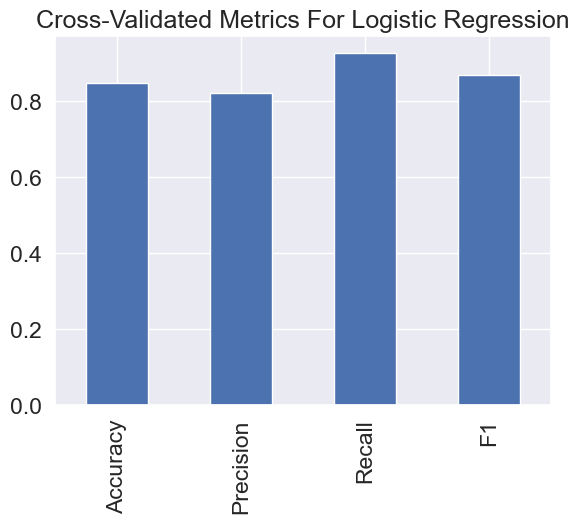

In [82]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                            "Precision": np.mean(cv_precision),
                            "Recall": np.mean(cv_recall),
                            "F1": np.mean(cv_f1score)
                                          },
                          index=[0])
plt.clf();
cv_metrics.T.plot.bar(title="Cross-Validated Metrics For Logistic Regression", legend=False);
plt.show();

### Feature Importance

<Figure size 640x480 with 0 Axes>

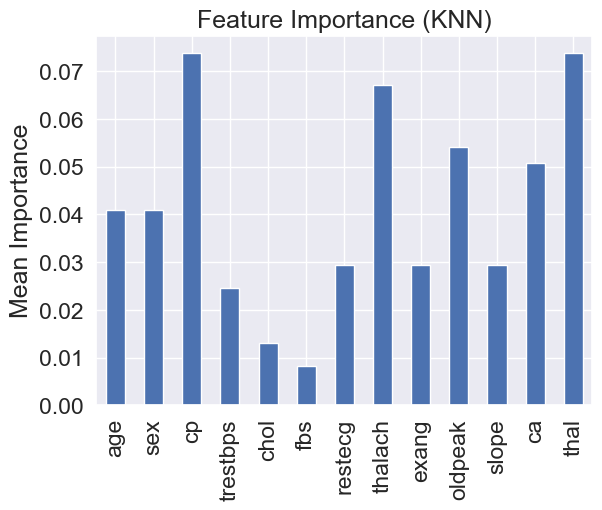

In [88]:
# Kneighbors Feature Importance
# K-Nearest Neighbors (KNN) is a non-parametric algorithm that doesn't compute feature coefficients like Logistic Regression. 
# Therefore, it doesn't provide inherent feature importance. However, you can estimate feature importance for KNN using techniques like 
# permutation importance or SHAP values.
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(knn_model, X_test_scaled, Y_test, n_repeats=10, random_state=42)
features_dict = dict(zip(X_test.columns, result.importances_mean))
features_df = pd.DataFrame(features_dict, index=[0])

# Visualize 
plt.clf()
features_df.T.plot.bar(title="Feature Importance (KNN)", legend=False)
plt.ylabel("Mean Importance")
plt.show()

<Figure size 640x480 with 0 Axes>

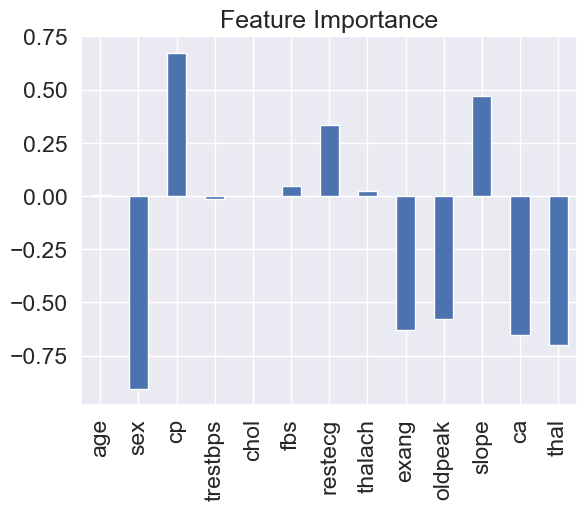

In [87]:
#Logistic Regression Feature Importance
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict
#Visualize
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
plt.clf();
features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show();

In [89]:
# The negatve correlation means when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [90]:
# This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.In this case, we didn't.

* The highest accuracy our model achieved was below 92%.

* Could collect more data? Across more patients with more features? This may take a while but in machine learning, more data is generally better.

* Could try a better model? If working with structured data, might want to look into CatBoost or XGBoost.

* Could improve the current models ?